In [1]:
import requests
from bs4 import BeautifulSoup
import os
import pickle

from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from wordcloud import WordCloud, STOPWORDS
import regex as re
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# load headlines from all previous days (start at Feb21)

In [2]:
clean_headline_list_haaretz = pickle.load(open('ironAlgo/haaretzFeb24', 'rb'))
print(len(clean_headline_list_haaretz))

clean_headline_list_bibi = pickle.load(open('ironAlgo/bibiFeb24', 'rb'))
print(len(clean_headline_list_bibi))

348
257


# add new headlines and save

In [3]:
# clean_headline_list = []
url_haaretz = 'https://www.haaretz.com/'
for subsection in ['', 'haaretz-today', 'haaretz-daily-news', 'israel-news', 
                   'us-news', 'jewish', 'security-aviation','opinion', 
                   'middle-east-news', 'magazine', 'newsletters-page', 'archaeology']:
    url = url_haaretz+subsection+'/'
    response = requests.get(url)
    response.close()
    soup = BeautifulSoup(response.text, 'html.parser')
    headlines = soup.find('body').find_all('h3')
    for x in headlines:
        clean_headline = x.text.strip()
        if clean_headline not in clean_headline_list_haaretz:
            clean_headline_list_haaretz.append(clean_headline)
print(len(clean_headline_list_haaretz))

360


In [4]:
pickle.dump(clean_headline_list_haaretz, open('ironAlgo/haaretzFeb26', 'wb'))

In [5]:
# clean_headline_list = []
url_bibi = 'https://www.israelhayom.com/'
for subsection in ['', 'opinions', 'middle-east', 'jewish-world', 'world-news', 'magazine','special-coverage', 
                   'in-memoriam' 'category/news', 'category/analysis', 'category/commentary',
                  'category/features', 'category/politics', 'category/palestinian-authority-gaza-strip',
                  'category/iran-the-gulf', 'category/science-technology/startup-nation', 'category/archaeology', 
                  'category/science-technology', 'category/internet-and-cyber', 'category/economy/']:
    url = url_bibi+subsection+'/'
    response = requests.get(url)
    response.close()
    soup = BeautifulSoup(response.text, 'html.parser')
    headlines = soup.find('body').find_all('h3')
    for x in headlines:
        clean_headline = x.text.strip()
        if clean_headline not in clean_headline_list_bibi:
            clean_headline_list_bibi.append(clean_headline)
print(len(clean_headline_list_bibi))

260


In [6]:
pickle.dump(clean_headline_list_bibi, open('ironAlgo/bibiFeb26', 'wb'))

# clean the text

### remove punctuation

In [7]:
def clean_sentence(sentence):
    return re.sub(r"(@\[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", sentence.lower())

In [8]:
new_sentences_bibi_with_stopwords = [clean_sentence(sentence) for sentence in clean_headline_list_bibi]   
new_sentences_haaretz_with_stopwords = [clean_sentence(sentence) for sentence in clean_headline_list_haaretz]   

In [9]:
new_sentences_bibi_with_stopwords = [sent.replace('netanyahus', 'netanyahu') for sent in new_sentences_bibi_with_stopwords]
new_sentences_haaretz_with_stopwords = [sent.replace('netanyahus', 'netanyahu') for sent in new_sentences_haaretz_with_stopwords]

##### 

### tokenize words

In [10]:
from nltk.tokenize import word_tokenize
new_sentences_haaretz_tokenized = [word_tokenize(sentence) for sentence in new_sentences_haaretz_with_stopwords]
new_sentences_bibi_tokenized = [word_tokenize(sentence) for sentence in new_sentences_bibi_with_stopwords]

### remove stopwords

In [11]:
stopwords = set(STOPWORDS)
new_sentences_bibi_all = [[word for word in sentence_list if word not in stopwords] for sentence_list in new_sentences_bibi_tokenized]  
new_sentences_haaretz_all = [[word for word in sentence_list if word not in stopwords] for sentence_list in new_sentences_haaretz_tokenized]  

### delete short sentences that are usualy not headers

Israel haYom has 237 headers
Haaretz has 356 headers


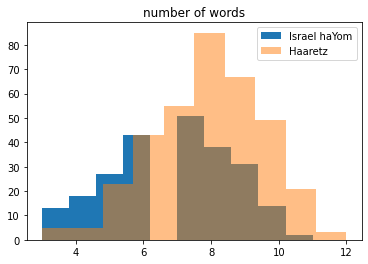

In [12]:
new_sentences_bibi = [sentence_list for sentence_list in new_sentences_bibi_all if len(sentence_list)>=3]
new_sentences_haaretz = [sentence_list for sentence_list in new_sentences_haaretz_all if len(sentence_list)>=3]


print(f'Israel haYom has {len(new_sentences_bibi)} headers\nHaaretz has {len(new_sentences_haaretz)} headers')

bibi_len_vector = np.array([len(i) for i in new_sentences_bibi])
haaretz_len_vector = np.array([len(i) for i in new_sentences_haaretz])

plt.hist(bibi_len_vector, bins=10, label='Israel haYom')
plt.hist(haaretz_len_vector, bins=10, alpha=0.5, label='Haaretz')
plt.title('number of words')
plt.legend()
plt.show()

In [13]:
new_sentences_bibi[0]

['putin', 'generals', 'take', 'note', 'ukraine', 'won']

In [14]:
new_sentences_haaretz[2]

['israel', 'fall', 'syrias', 'quiet', 'outreach']

# word cloud for both newspapers

In [15]:
text_bibi = list(itertools.chain.from_iterable(new_sentences_bibi))
text_bibi[:10]

['putin',
 'generals',
 'take',
 'note',
 'ukraine',
 'won',
 'judicial',
 'reform',
 'advances',
 'knesset']

In [16]:
text_haaretz = list(itertools.chain.from_iterable(new_sentences_haaretz))
text_haaretz[:10]

['netanyahu',
 'dogmatic',
 'righthand',
 'man',
 'already',
 'blocked',
 'escape',
 'route',
 'standoff',
 'protesters']

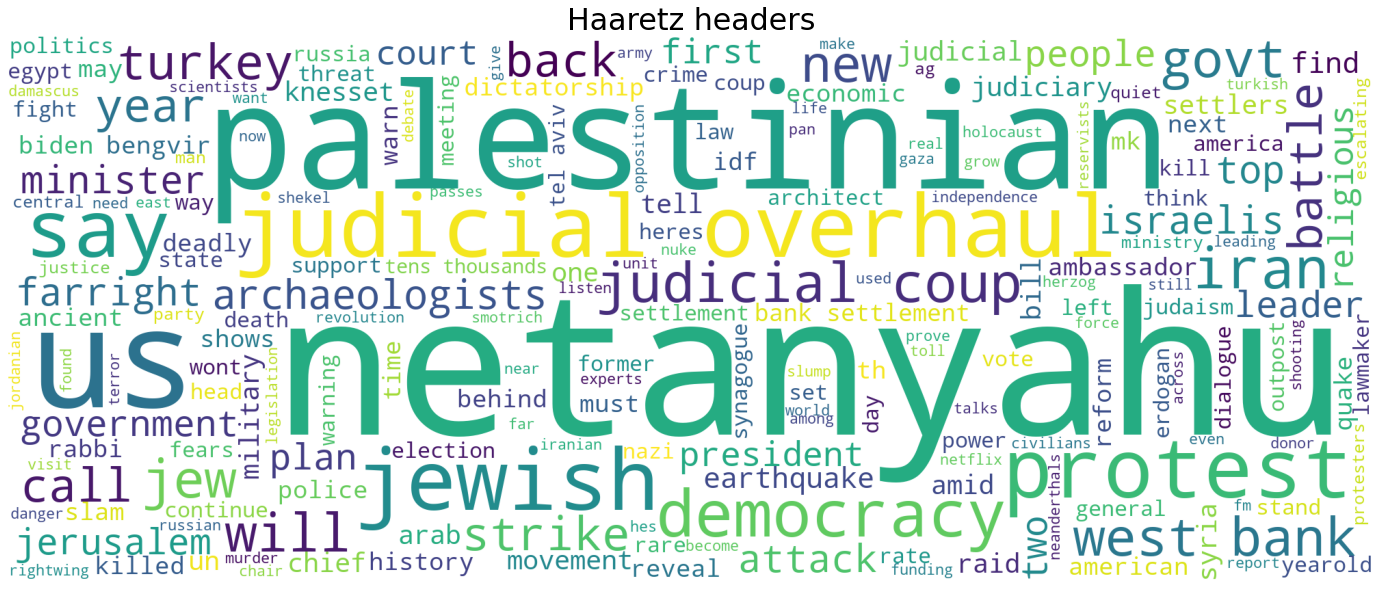

In [17]:
stopwords = set(STOPWORDS).union(set(['israel', 'israeli', 'israels']))

wordcloud = WordCloud(width = 2000, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(' '.join(text_haaretz))
 
# plot the WordCloud image                      
plt.figure(figsize = (20, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Haaretz headers', fontsize=30)
plt.tight_layout(pad = 0)
plt.show()

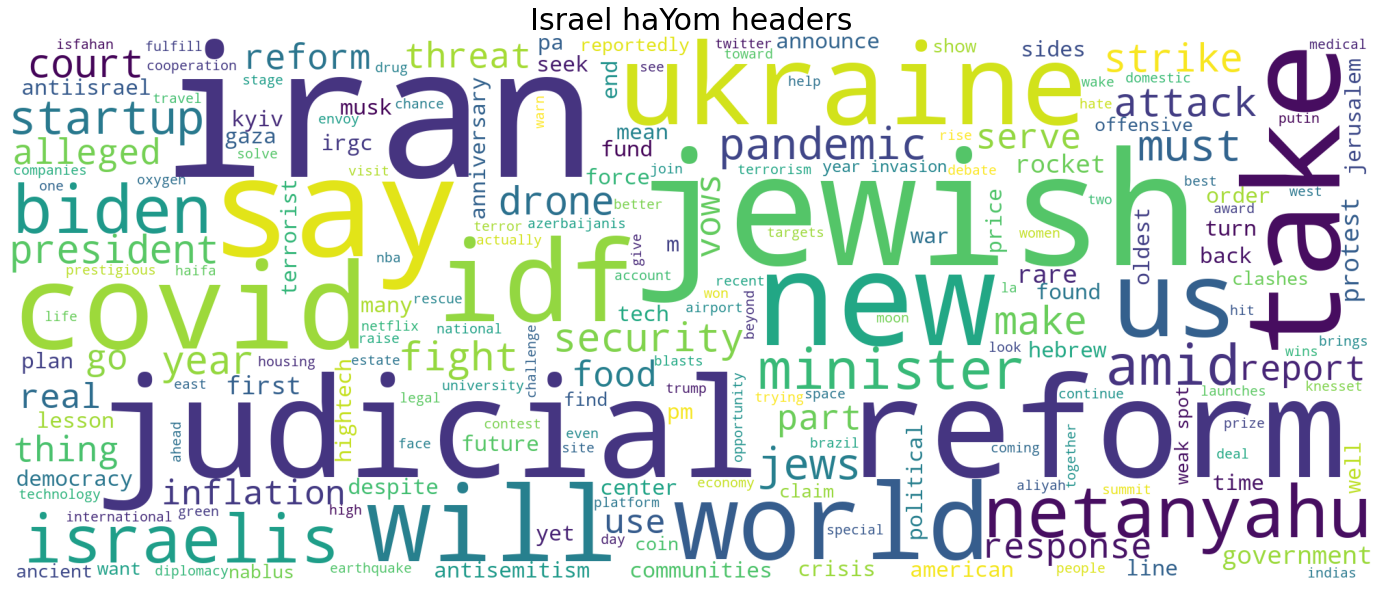

In [18]:
wordcloud = WordCloud(width = 2000, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(' '.join(text_bibi))
 
# plot the WordCloud image                      
plt.figure(figsize = (20, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Israel haYom headers', fontsize=30)
plt.tight_layout(pad = 0)

plt.show()

# investigate words' frequencies for both newspapers

In [19]:
def get_df_all_words(list_of_words):
    counter_keys = Counter(list_of_words).keys()
    counter_values = Counter(list_of_words).values()
    counter_values_np = np.fromiter(counter_values, dtype=float)
   
    df_words = pd.DataFrame({'counts':counter_values}, index=counter_keys)
#     df_words = df_words[df_words['counts']>2]
    return df_words

In [20]:
df_bibi = get_df_all_words(text_bibi)
print('frequency of words in Israel haYom all headlines')
df_bibi['counts'].value_counts()

frequency of words in Israel haYom all headlines


1     833
2     145
3      46
4      21
6       8
5       7
7       4
9       3
11      1
10      1
24      1
43      1
14      1
13      1
8       1
Name: counts, dtype: int64

In [21]:
df_haaretz = get_df_all_words(text_haaretz)
print('frequency of words in Haaretz all headlines')
df_haaretz['counts'].value_counts()

frequency of words in Haaretz all headlines


1     1018
2      249
3       96
4       33
5       30
6       10
8        7
7        6
13       5
9        4
59       3
15       3
10       2
16       1
44       1
24       1
11       1
20       1
53       1
23       1
12       1
25       1
18       1
Name: counts, dtype: int64

In [22]:
df_haaretz.columns = ['counts_haaretz']
df_bibi.columns = ['counts_bibi']

In [23]:
df_all = df_haaretz.join(df_bibi, how='outer')
df_all.fillna(0, inplace=True)

In [24]:
df_all['counts_together'] = df_all['counts_haaretz']+df_all['counts_bibi']
df_all[(df_all['counts_haaretz']>1)&(df_all['counts_bibi']>1)]

,counts_haaretz,counts_bibi,counts_together
american,5.0,2.0,7.0
amid,6.0,6.0,12.0
ancient,5.0,3.0,8.0
antisemitism,2.0,3.0,5.0
attack,8.0,5.0,13.0
...,...,...,...
will,13.0,7.0,20.0
world,2.0,6.0,8.0
year,4.0,5.0,9.0
yearold,4.0,2.0,6.0


#### the most frequent words in both newspapers

In [25]:
df_all[df_all['counts_together']>20]

,counts_haaretz,counts_bibi,counts_together
democracy,20.0,3.0,23.0
iran,15.0,14.0,29.0
israel,59.0,43.0,102.0
israeli,53.0,24.0,77.0
israels,59.0,9.0,68.0
jewish,23.0,13.0,36.0
judicial,44.0,11.0,55.0
netanyahu,59.0,7.0,66.0
overhaul,24.0,1.0,25.0
says,15.0,9.0,24.0


In [26]:
common_words = list(df_all[(df_all['counts_haaretz']>1)&(df_all['counts_bibi']>1)].index)

In [27]:
new_sentences_bibi_only_common = [[word for word in sentence if word in common_words] for sentence in new_sentences_bibi]

### I can't use OneHot encoding using commong words since some input do not contain common words

In [28]:
new_sentences_bibi_only_common[:5]

[['putin', 'ukraine'],
 ['judicial', 'reform', 'knesset', 'debate'],
 ['says', 'legal', 'democracy'],
 ['pm', 'us'],
 []]

# define the final preprocessing function

In [29]:
from wordcloud import STOPWORDS

def clean_sentence(sentence):
    return re.sub(r"(@\[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", sentence.lower())

def headline_preparation(headline):
    clean_headline = clean_sentence(headline).replace('netanyahus', 'netanyahu')
    token_headline = word_tokenize(clean_headline)
    
    stopwords = set(STOPWORDS)
    headline_list = [word for word in token_headline if word not in stopwords]
    if len(headline_list)<3:
        return None
    else:
        return headline_list